In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
train_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Observations

- The average delay in flights are 15 minutes, with a deviation of 38
- Median of the delays are 0, which means 50% of the flights from this data, were not delayed

In [5]:
## removing the first two columns
train_df.drop(["Unnamed: 0", 'id'], axis=1, inplace=True)

In [6]:
train_df.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [7]:
## shape of the train dataset
train_df.shape

(103904, 23)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

- Only Arrival Delay in Minutes has null values. Lets visualize to see any patterns in the missing values

In [9]:
#pip install missingno

In [10]:
import missingno as msno

<Axes: >

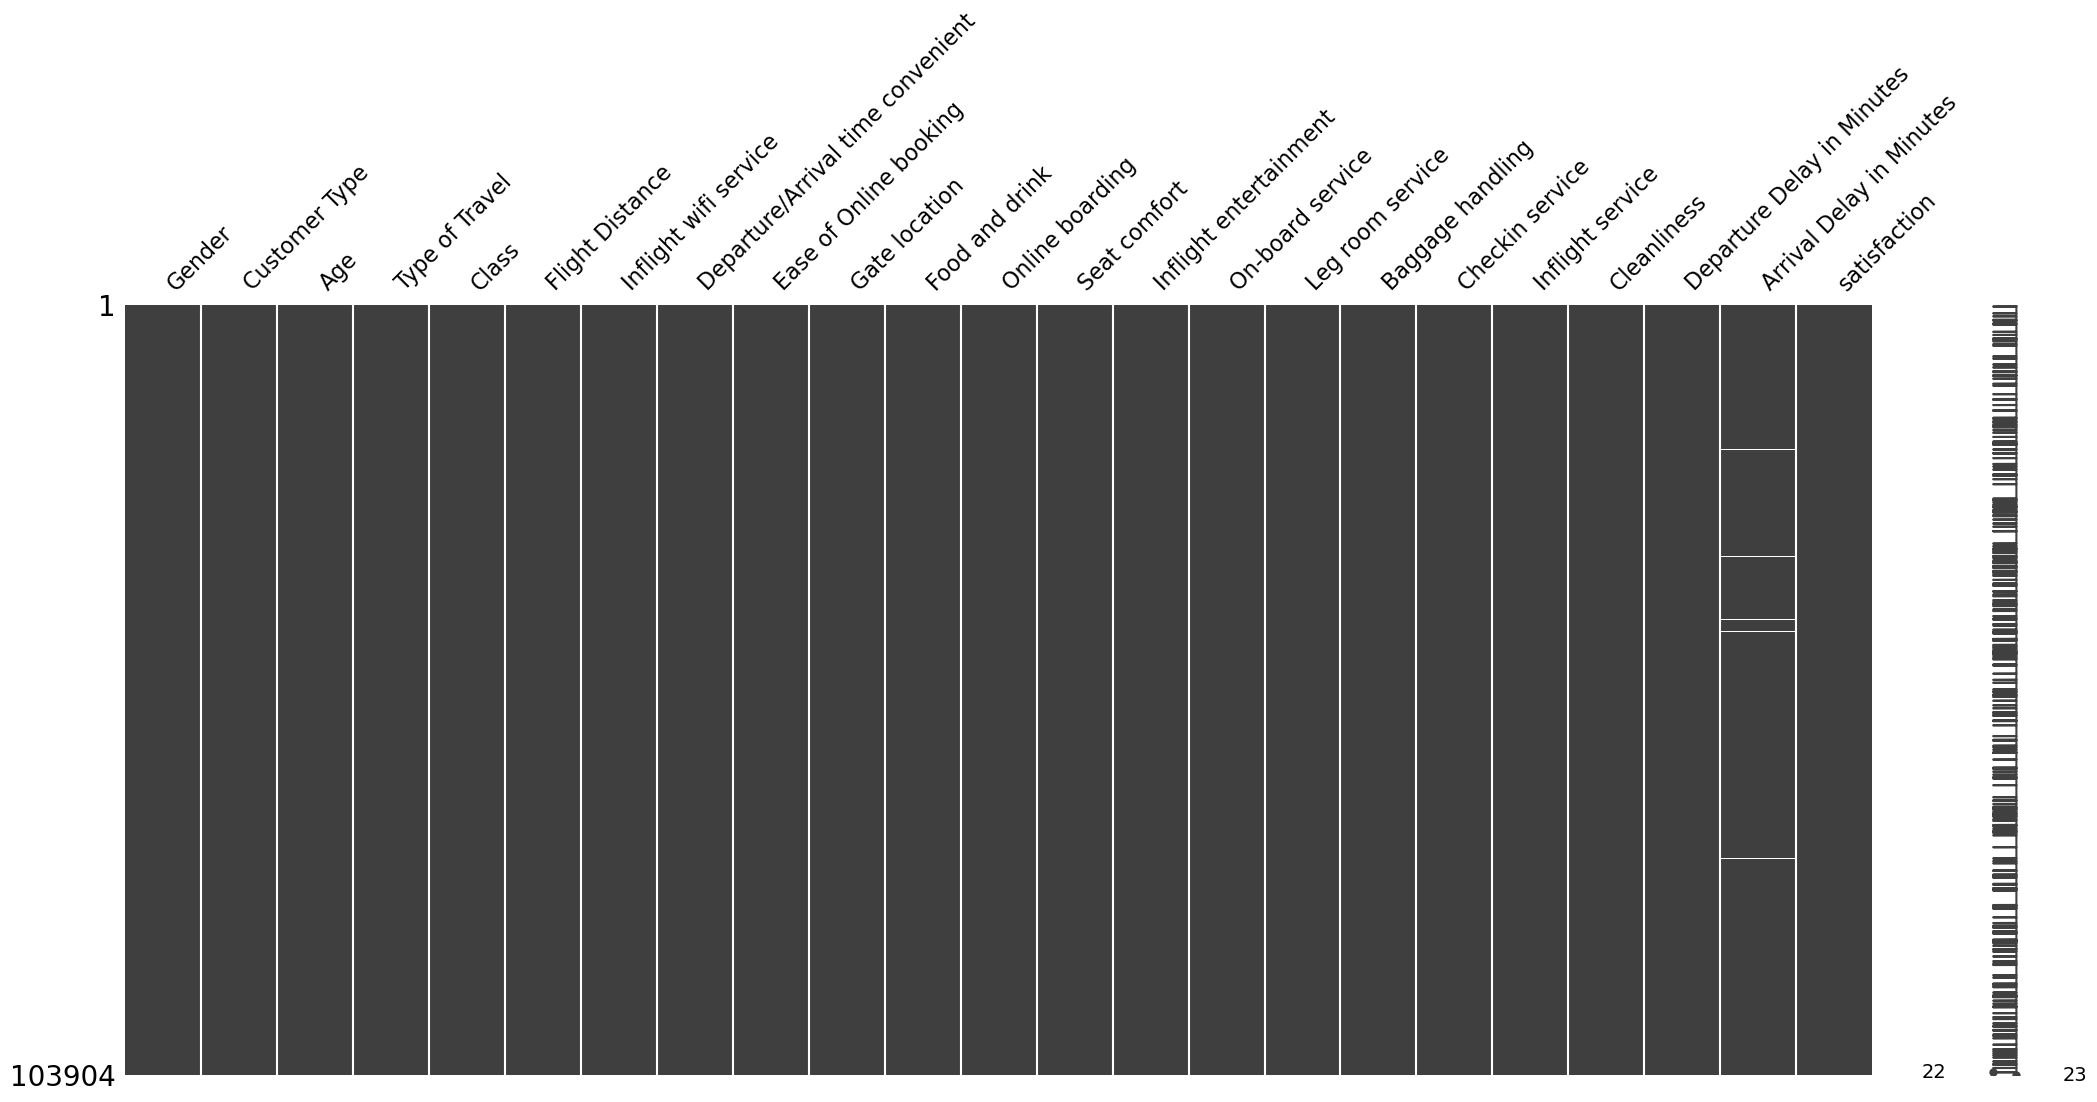

In [11]:
msno.matrix(train_df)

#### Observations

- There are 103904 rows for 23 features in our data
- we see in the training data, that all the datatypes belongs to a numeric class that is int, float and object
- only arrival delay in minutes have some null values

In [12]:
## percentage of null values
train_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

- The number of null values is 310 in "Arrival Delay in Minutes" column
- The percentage of null values is ~ 0.3%

In [13]:
round(train_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.38,15.11,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.45,997.15,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.73,1.33,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.06,1.53,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.76,1.40,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.98,1.28,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.20,1.33,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.25,1.35,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.44,1.32,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.36,1.33,0.0,2.0,4.0,4.0,5.0


In [14]:
# Duplicate values
train_df.duplicated().sum()

0

In [15]:
# target variable
train_df.satisfaction.value_counts()[1]/len(train_df.satisfaction)*100

43.333269171542966

 - This problem is a binary classification problem of classes 0 or 1 denoting customer satisfaction, The class 1 has 43.33% of total values. Hence, this is a balanced learning problem. hence will not be requiring any resampling techniques to tackle this

**Independent Variables or features**

In [16]:
train_df.columns[:-1]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

### Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. 

In [17]:
train_df.corr(numeric_only= True)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

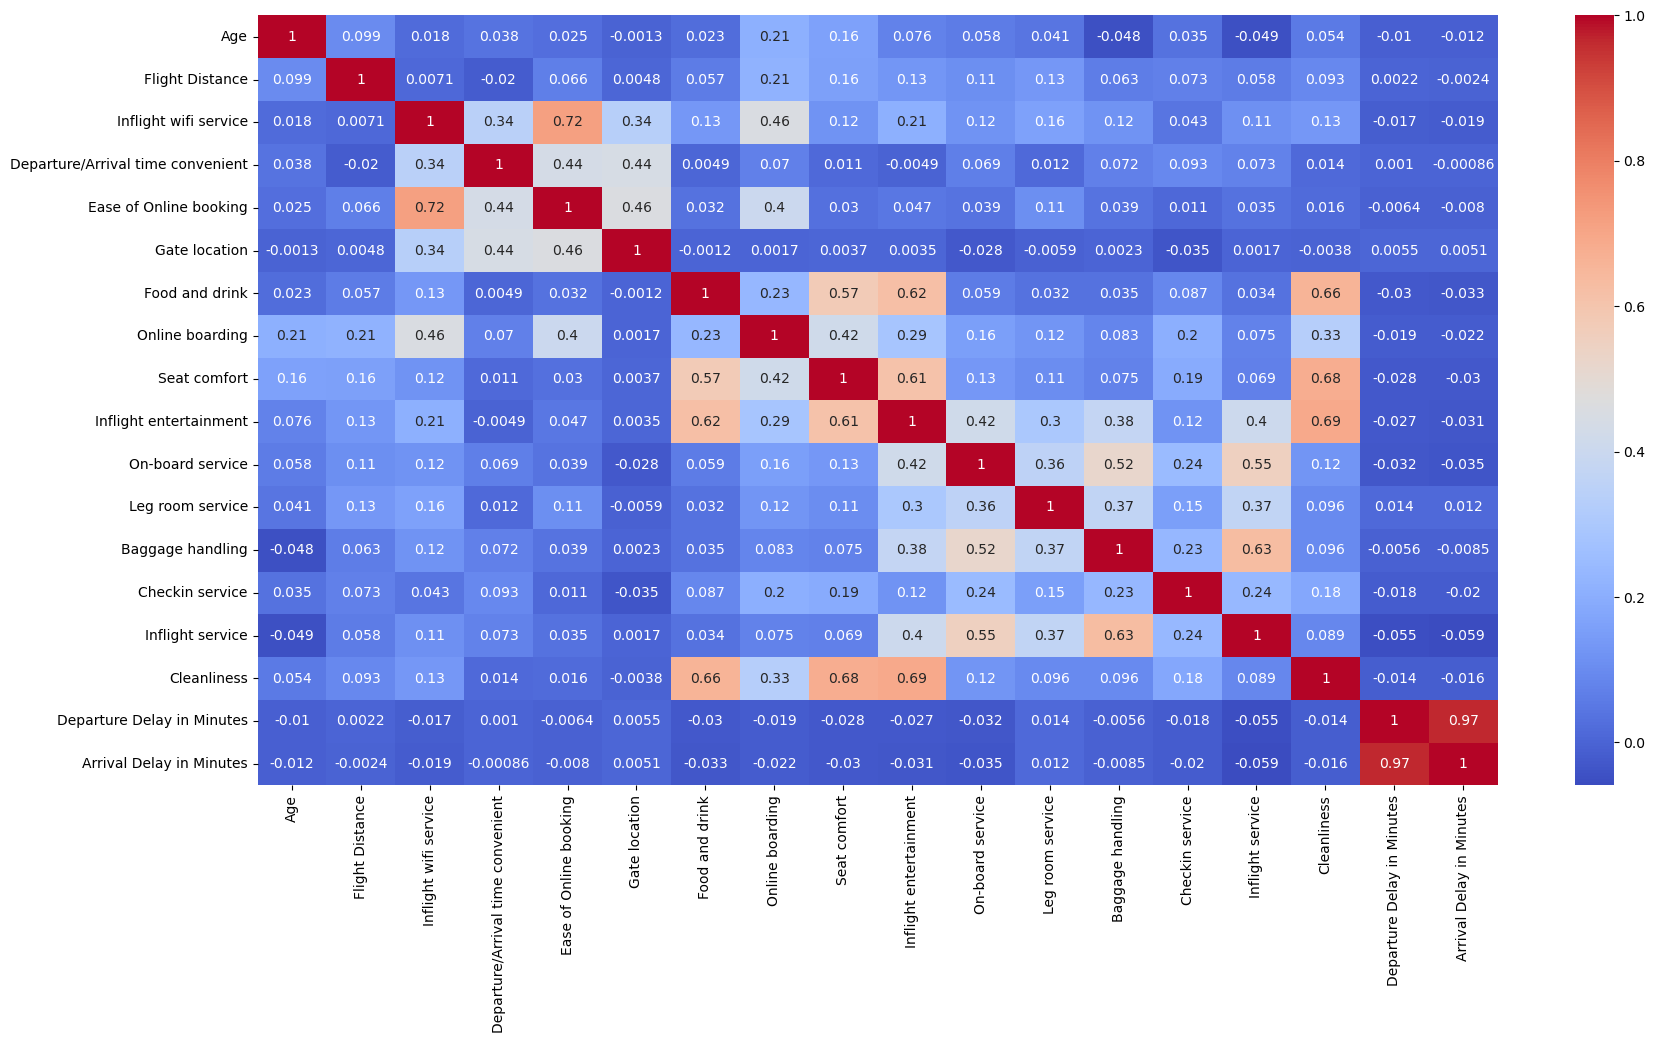

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(numeric_only= True), annot=True, vmax=1, cmap='coolwarm')
plt.show()

- departure delay in minutes and arrival dalay in minutes are highly co-related!

## Data distribution graphs

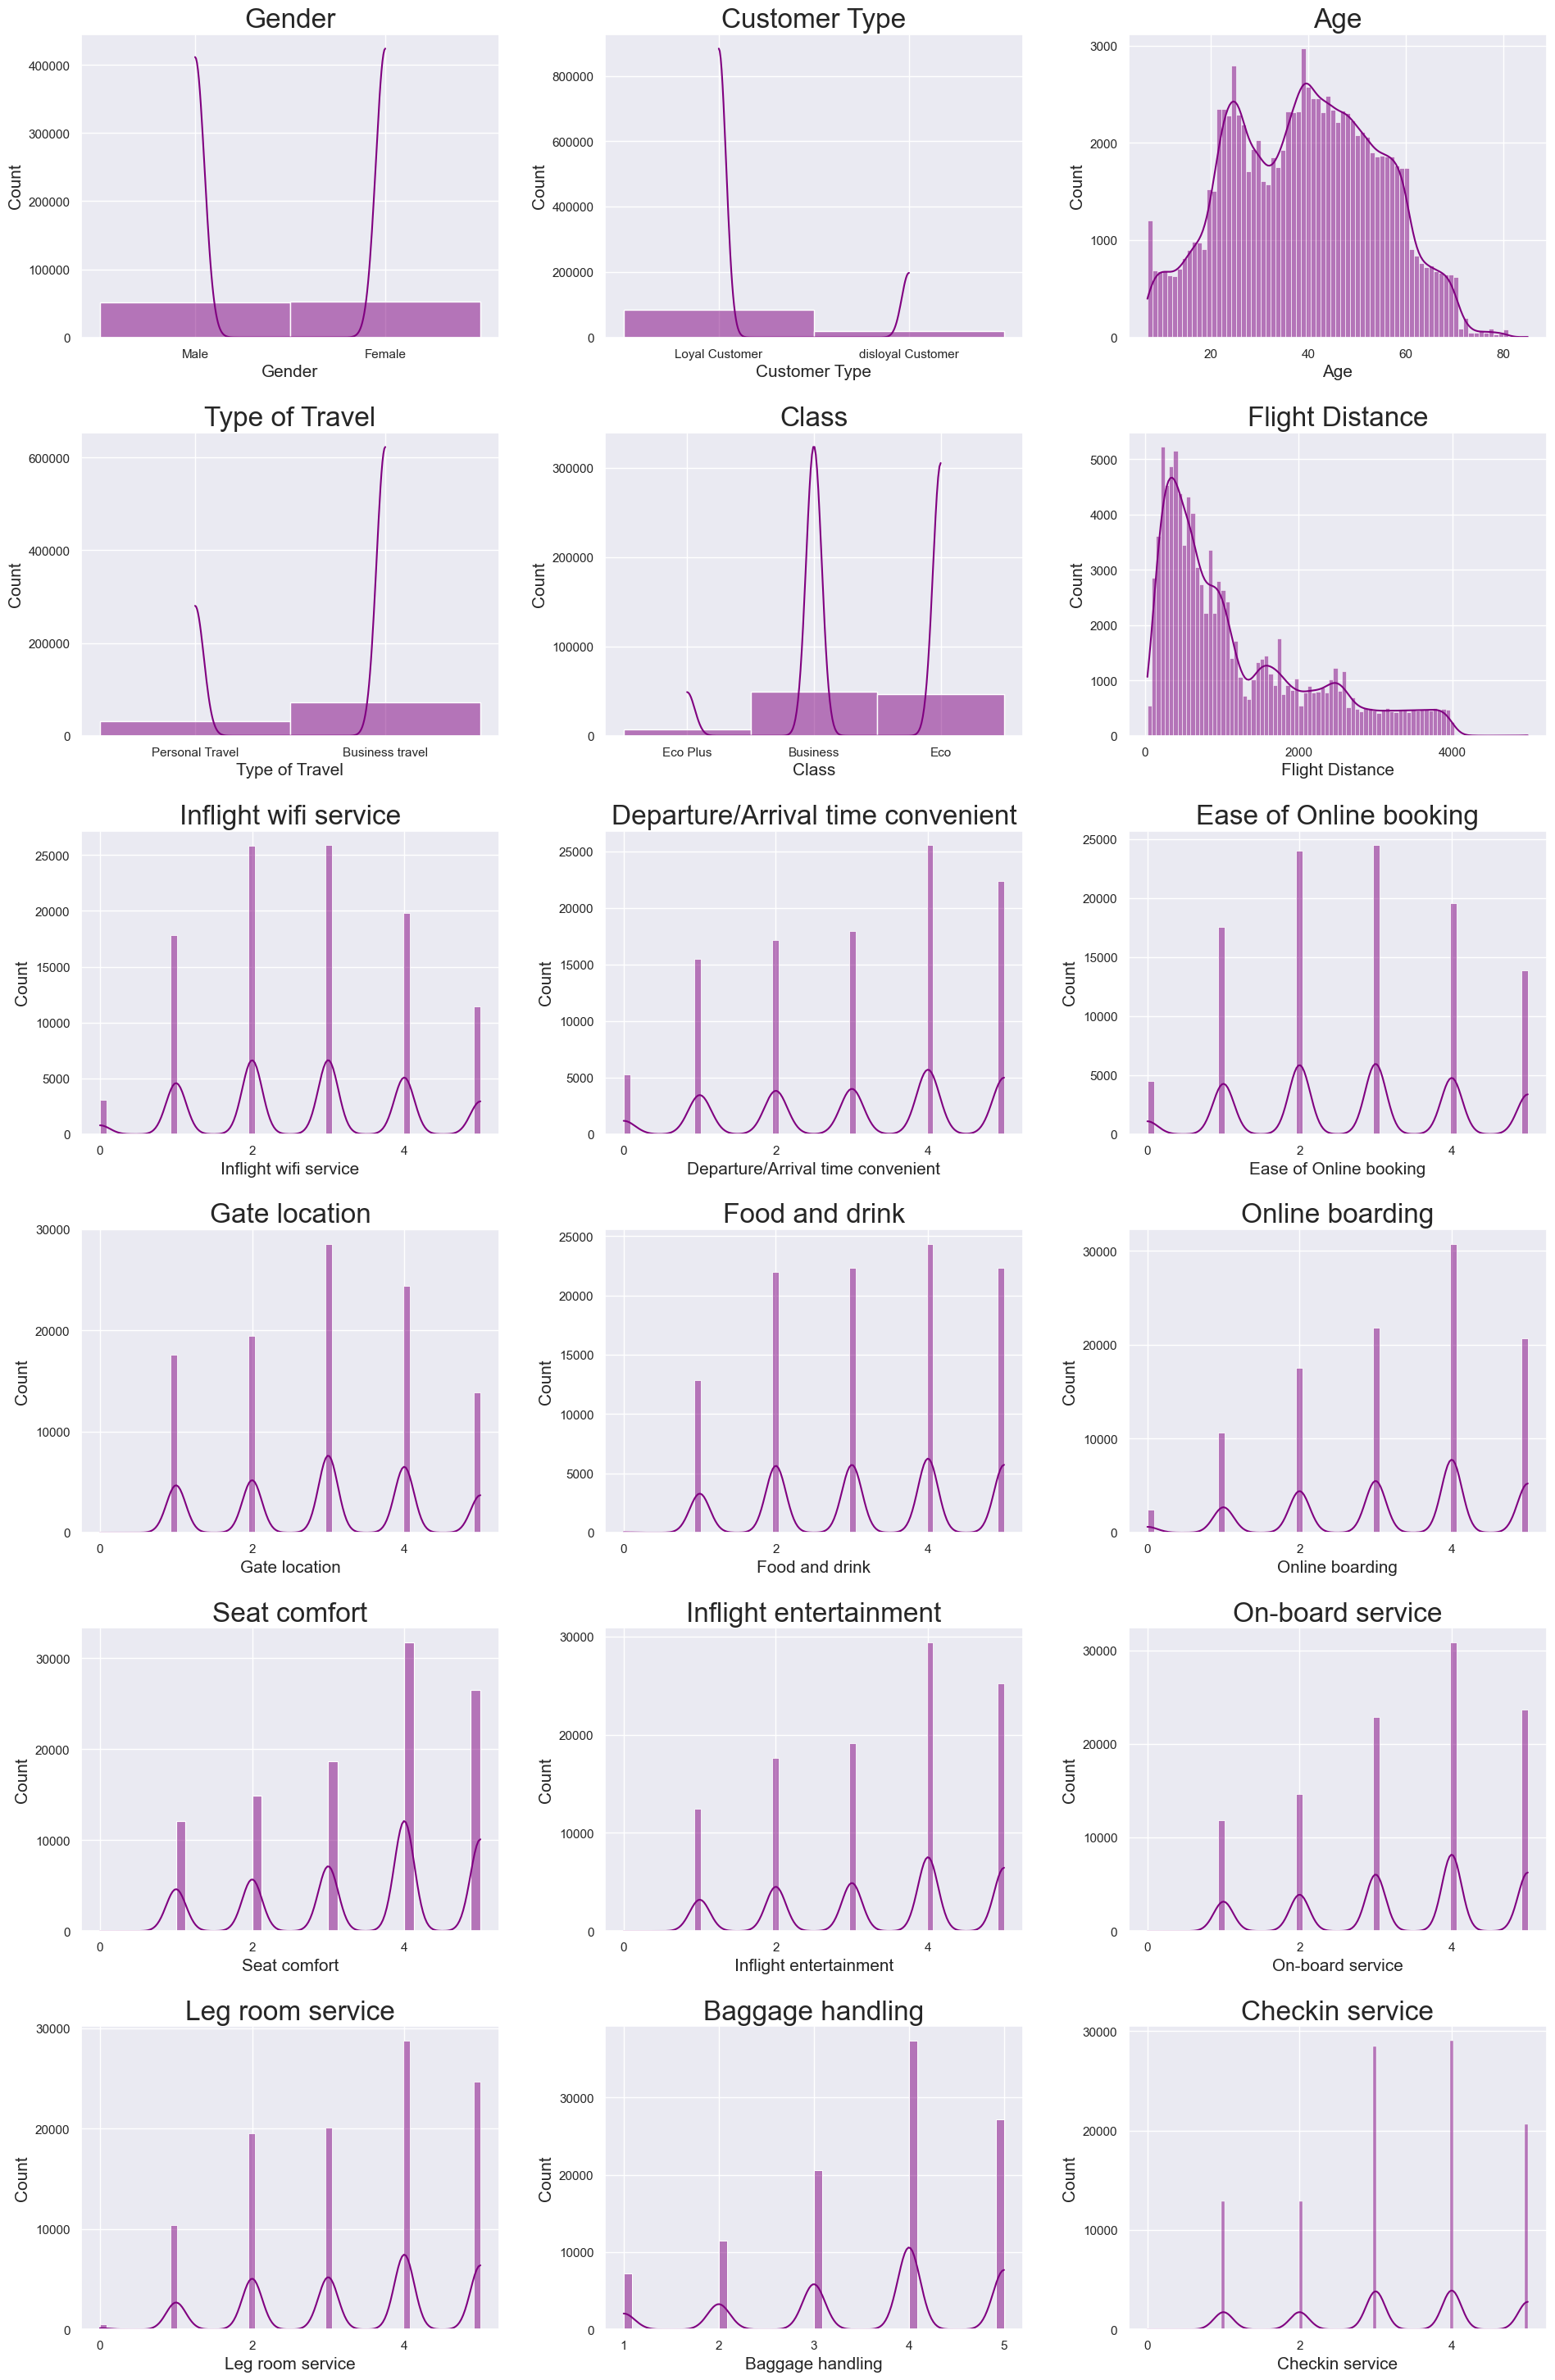

In [22]:
sns.set(rc={
    "font.size":15,
    "axes.titlesize":10,
    "axes.labelsize":15},
    style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f, ax in zip(train_df, axs.ravel()):
    sns.set(font_scale = 2)
    ax = sns.histplot(ax=ax, data=train_df, x=train_df[f], kde=True, color='purple')
    ax.set_title(f)

### Piechart perrcentage distribution features

In [23]:
new_train_df = train_df.copy()

In [24]:
new_train_df.drop(['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], axis=1, inplace=True)

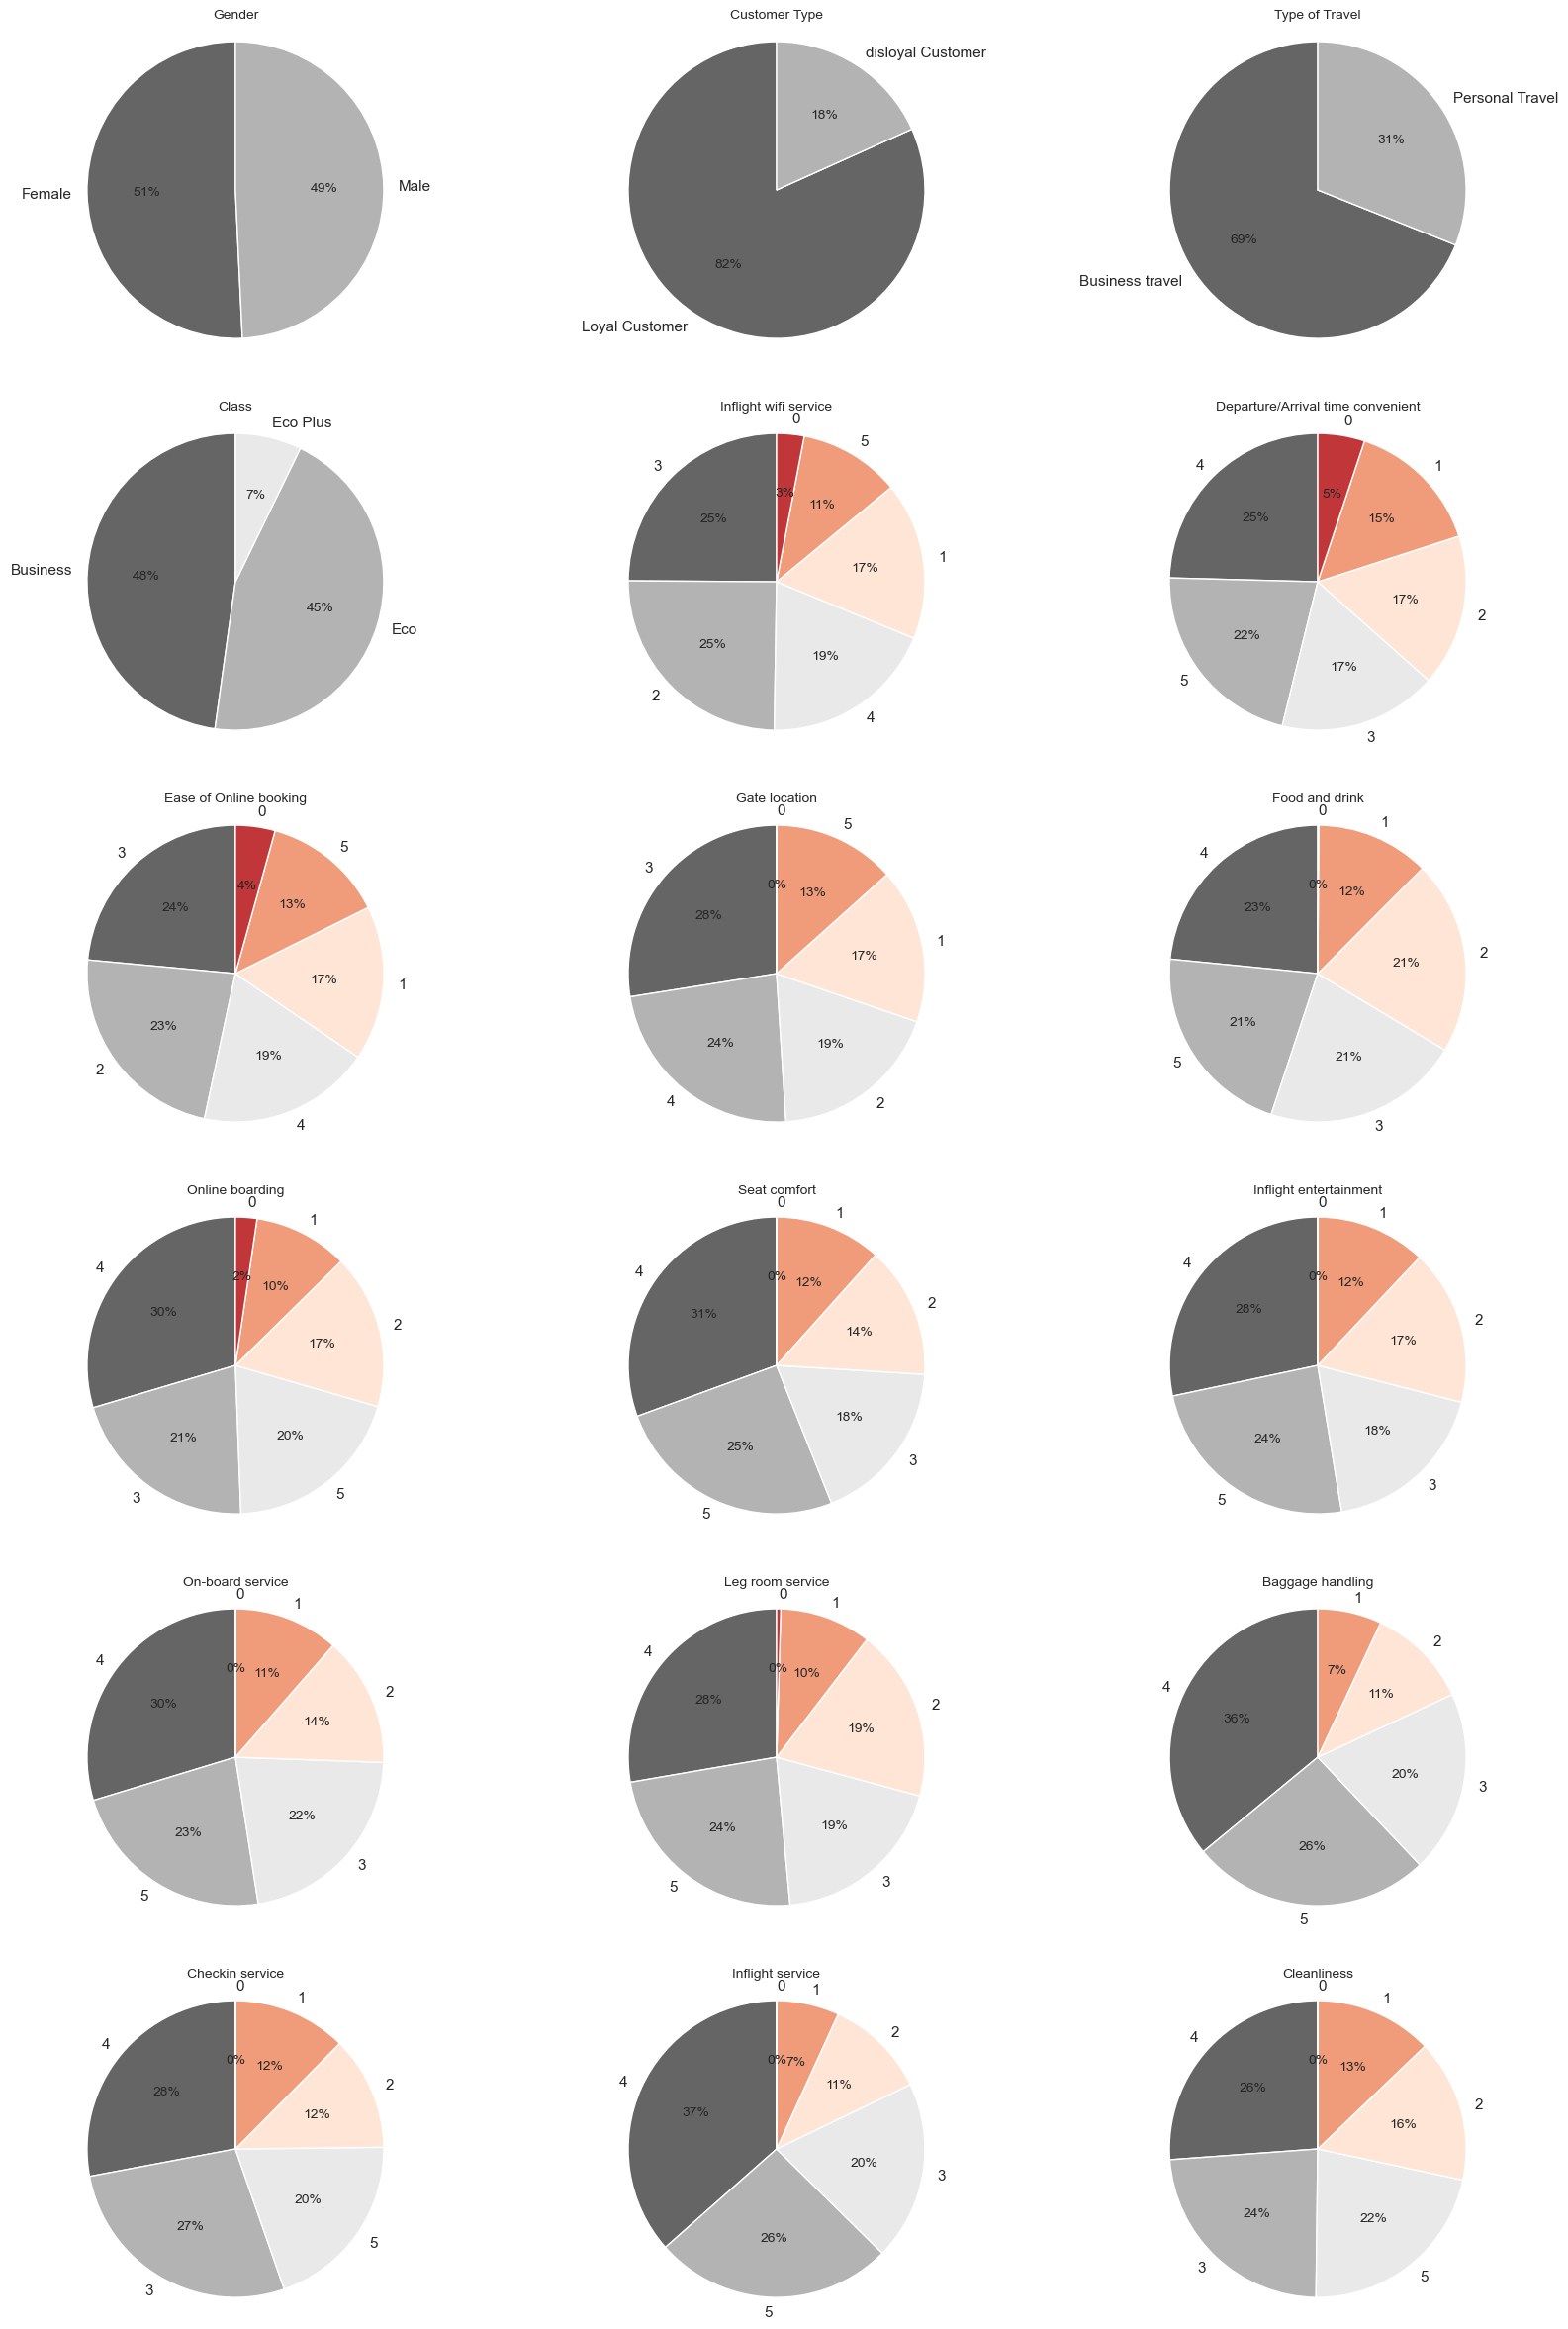

In [25]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes,labels = labels, colors = sns.color_palette("RdGy_r"),autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

**Observations:**

- The number of men and women in this sample is approximately the same
- The vast majority of the airline's customers are repeat customers
- Most of the clients flew for business rather than personal reasons
- About half of the passengers were in business class
- More than 60% of passengers were satisfied with the luggage transportation service(rated 4-5 out of 5)
- More than 50% of pessengers were compfortable sitting in thier seats(rated 4-5 out of 5)

In [26]:
## Satisfaction

In [27]:
train_df.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Satisfaction')

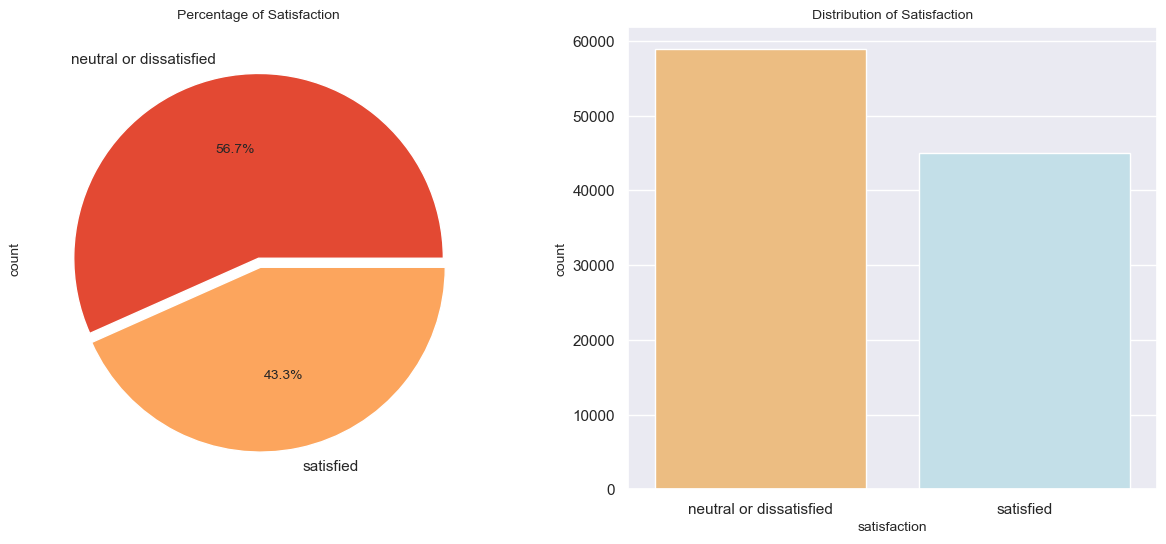

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
train_df.satisfaction.value_counts().plot.pie(explode=(0, 0.05), colors=sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title("Percentage of Satisfaction")
sns.countplot(x= "satisfaction", data=train_df, ax=ax2, palette='RdYlBu')
ax2.set_title("Distribution of Satisfaction")


**Observation:**

- As per the given data, 56.7% people are dissatisfied and neutral
- And 43.3 people are satisfied


To analyse and visualise the data lets divide data columns into categorical and numerical columns.

In [29]:
# numerical and categorical features
numerical_cols = train_df.select_dtypes(include=np.number).columns.to_list()
categorical_cols = train_df.select_dtypes('object').columns.to_list()

In [30]:
#numerical columns
print("Total number of columns are:",len(numerical_cols))
print(numerical_cols)

Total number of columns are: 18
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [31]:
#Categorical Columns
print("Total number of columns are:",len(categorical_cols))
print(categorical_cols)

Total number of columns are: 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [32]:
categorical_cols.remove('satisfaction')

## Exploratory Data Analysis and Visualization on Numerical Columns

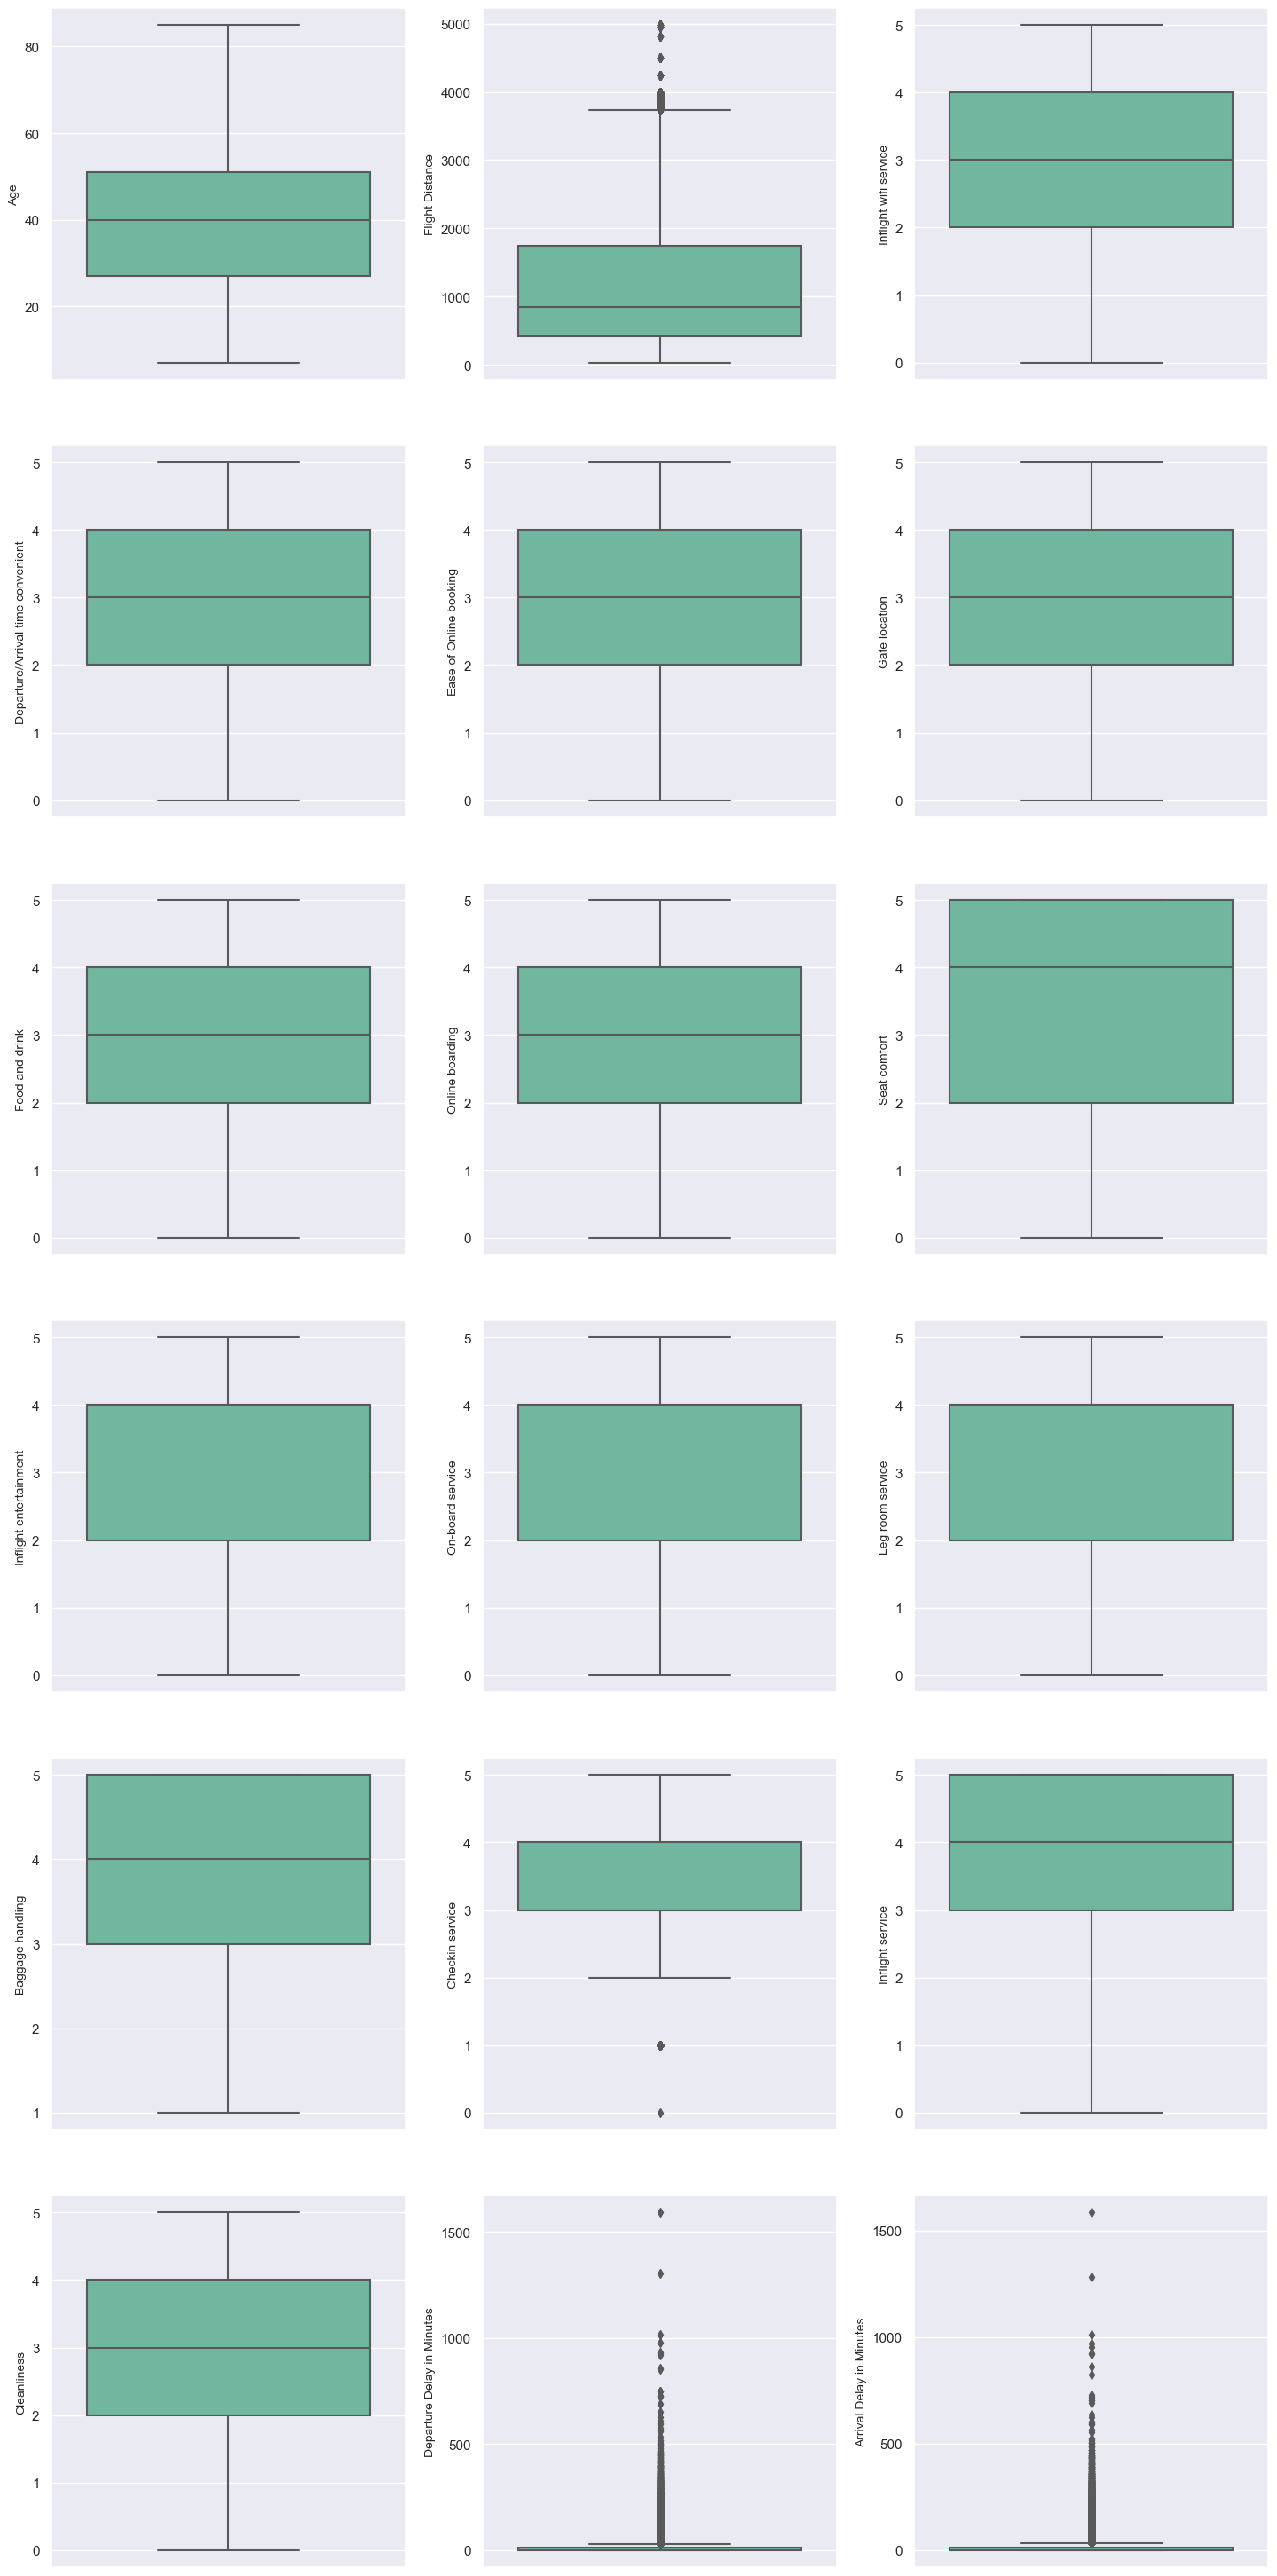

In [33]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
fig, axs = plt.subplots(6, 3, figsize=(15, 30))
fig.tight_layout(pad=3.0)

for f, ax in zip(numerical_cols, axs.ravel()):
    sns.set(font_scale=2)
    ax= sns.boxplot(ax=ax, data=train_df, y=train_df[f], palette='BuGn')

**Observations:**

Flight distance, checkin service, Departure Delay in minutes, Arrival delay in minutes has some outliers

### Barplot representation of numerical features

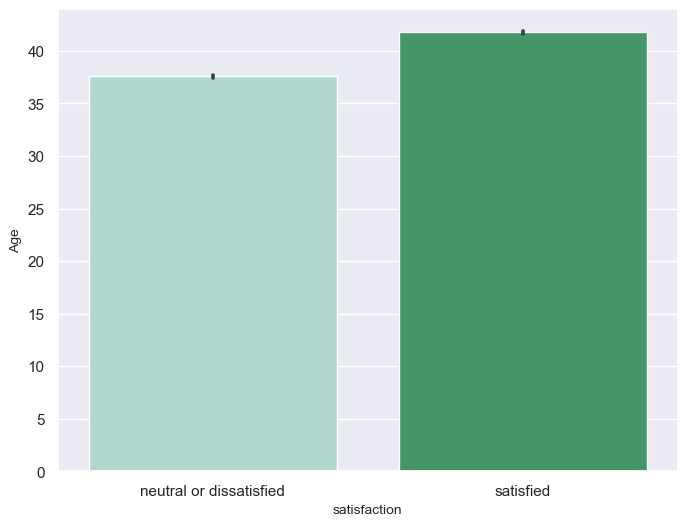

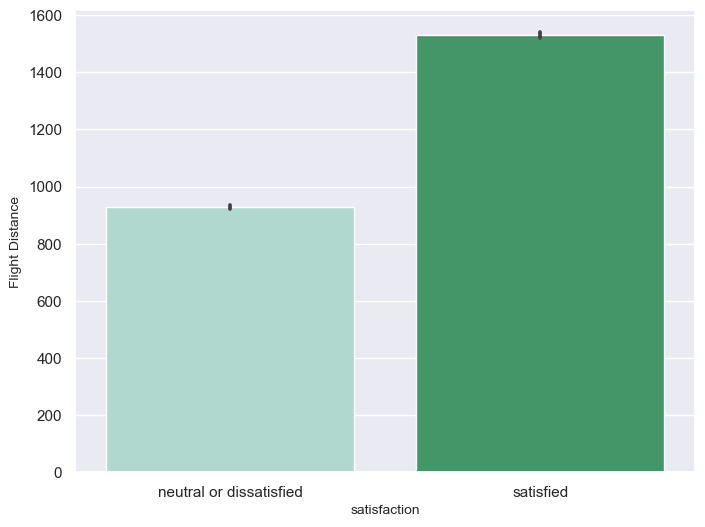

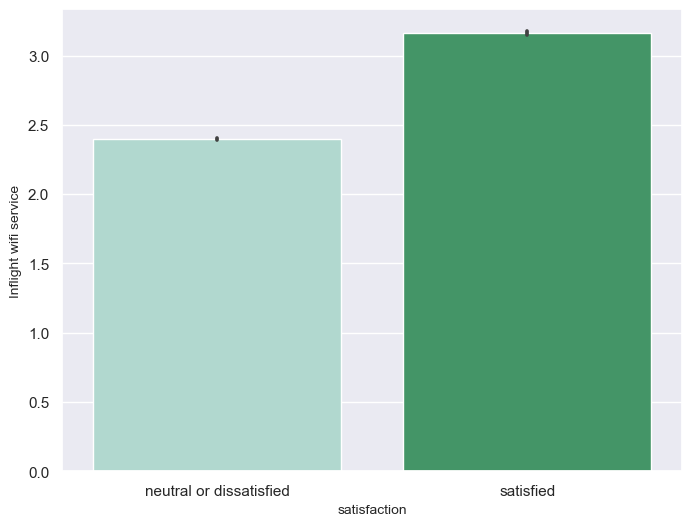

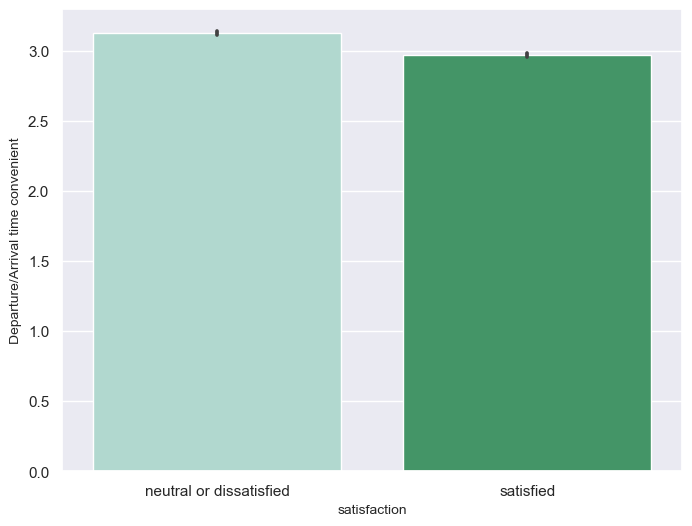

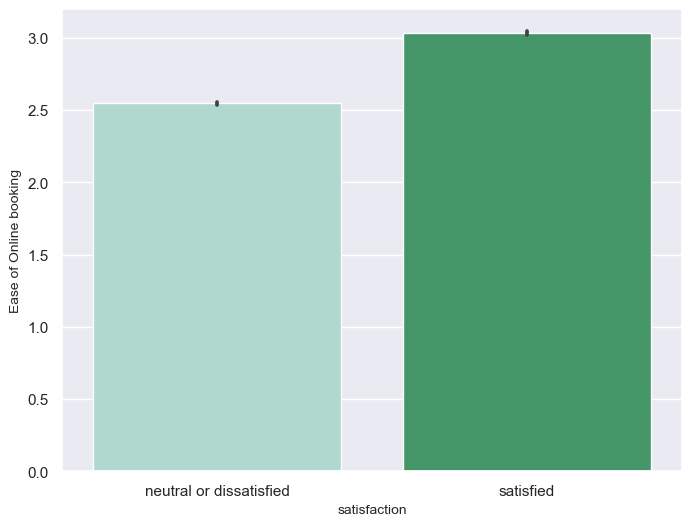

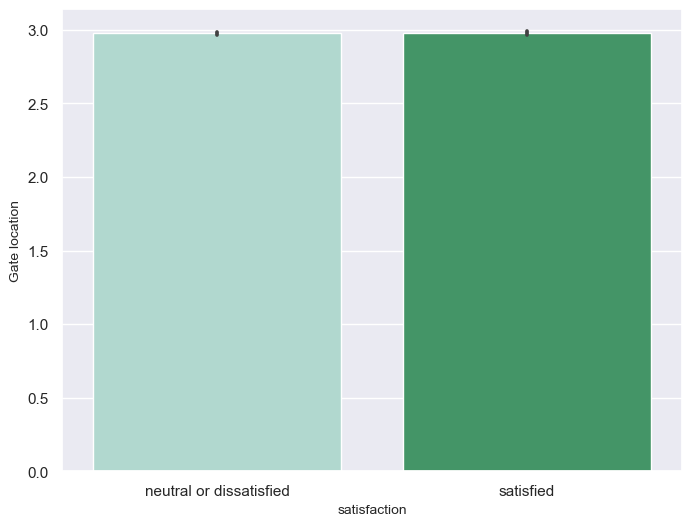

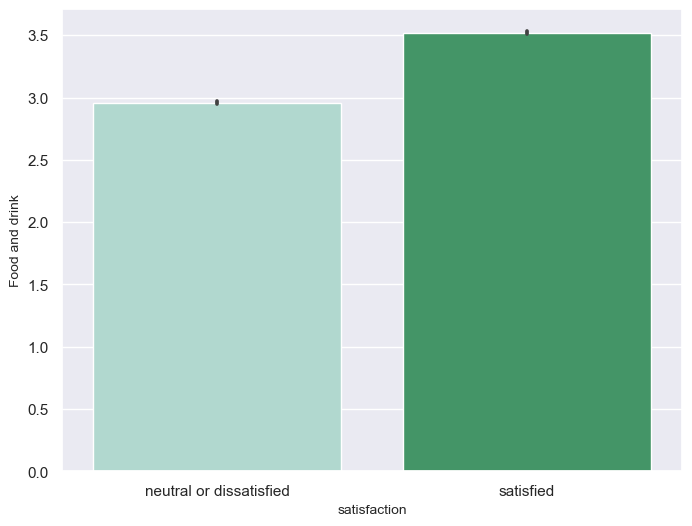

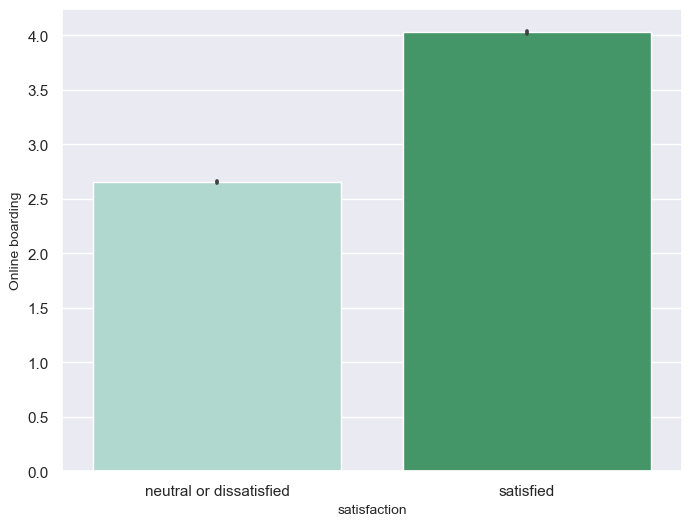

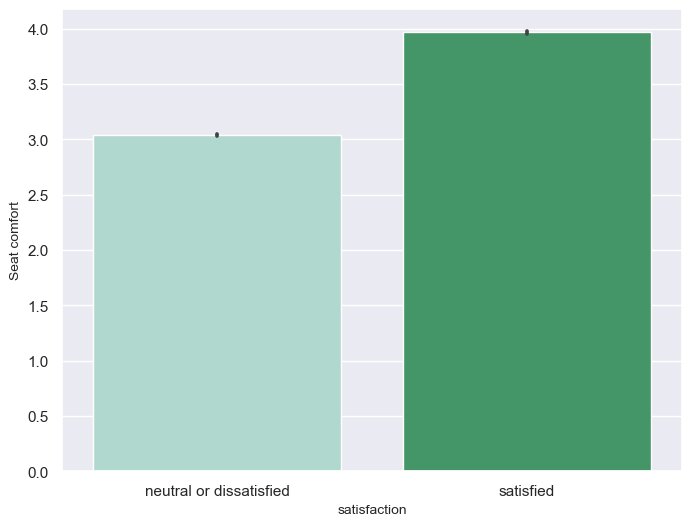

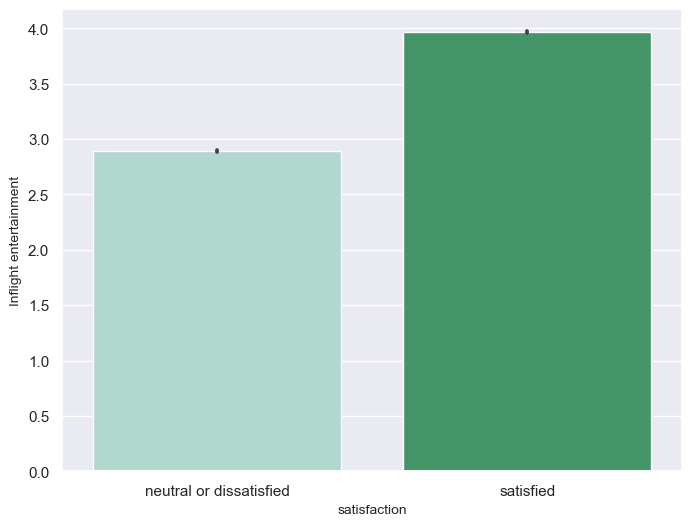

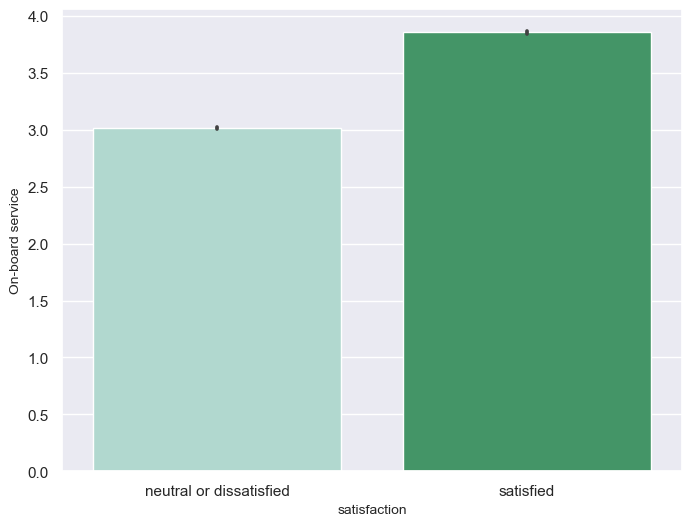

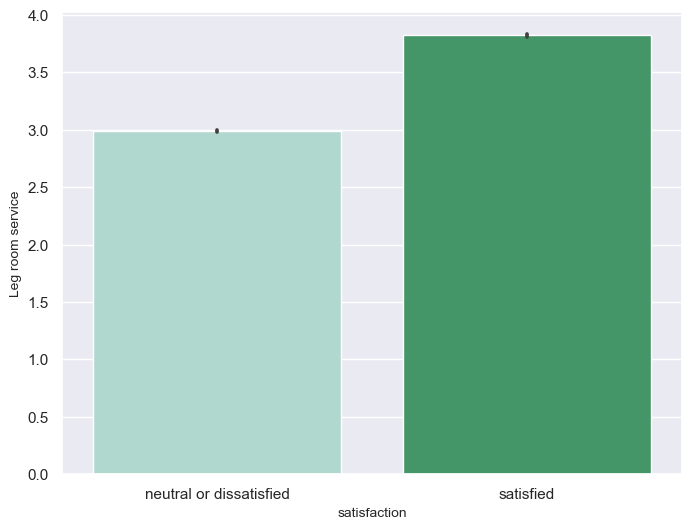

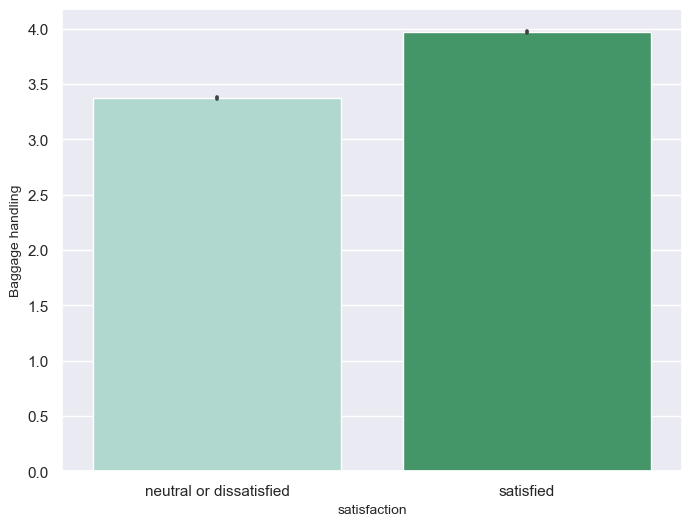

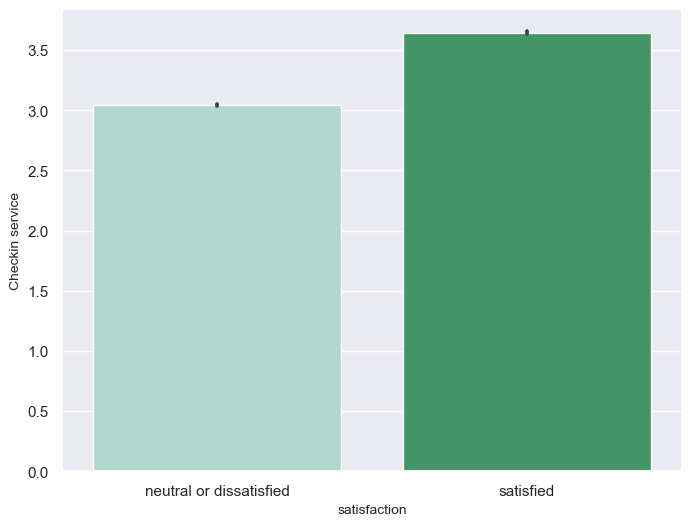

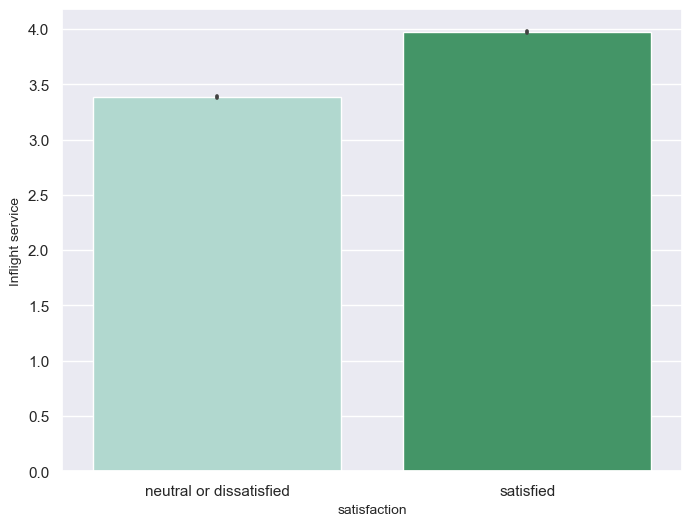

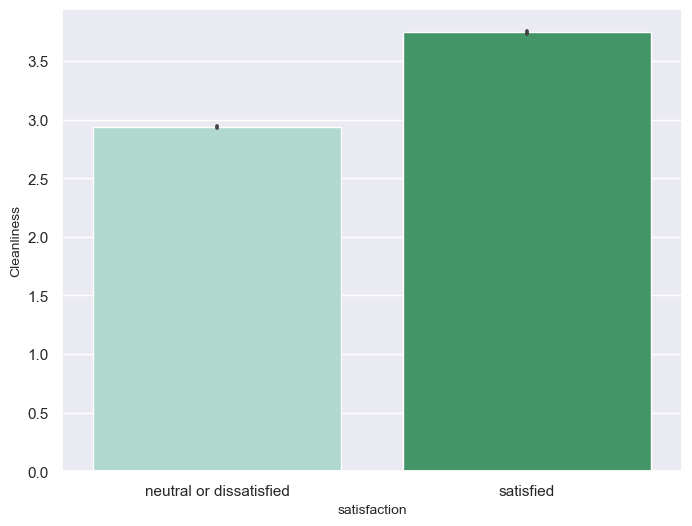

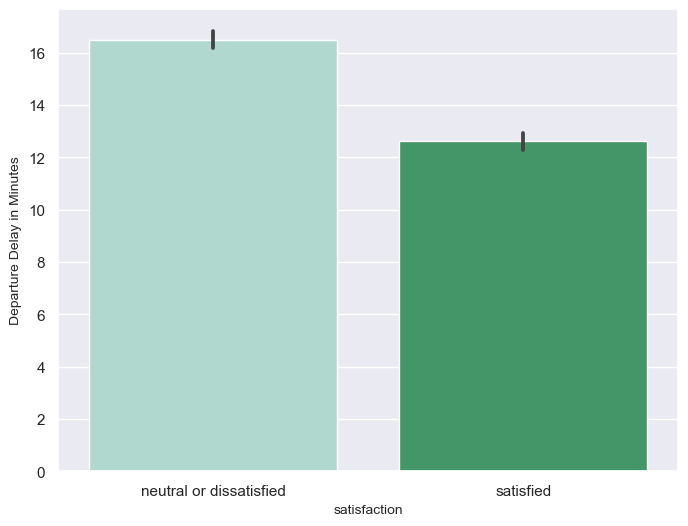

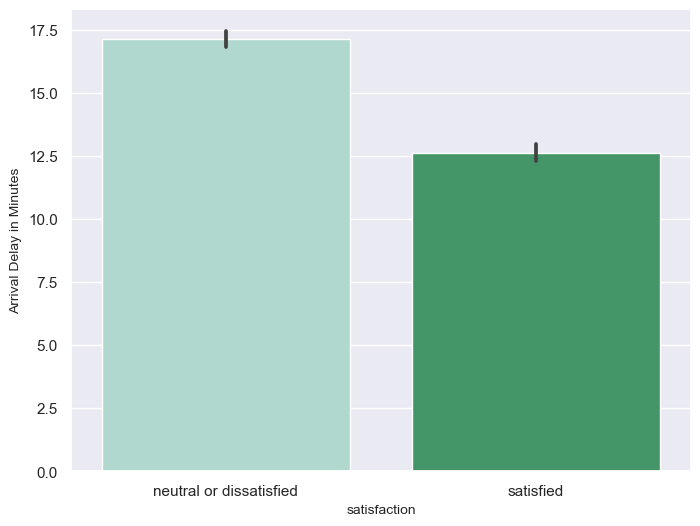

In [34]:
sns.set(rc={'figure.figsize':(8,6),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")

for col in numerical_cols:
    sns.barplot(data=train_df, x="satisfaction", y=col, palette='BuGn')
    plt.show()

**Observations:**

- From above graphs,it is clear that the age and Gate location, does not play a huge role in flight satisfaction.
- And also the gender does not tell us mush as seen in the earlier plot. hence we can rop these values 

## Exploratory Data Analysis and Visualization on Categorical Column

### Barplot representaion on Categoricol Column

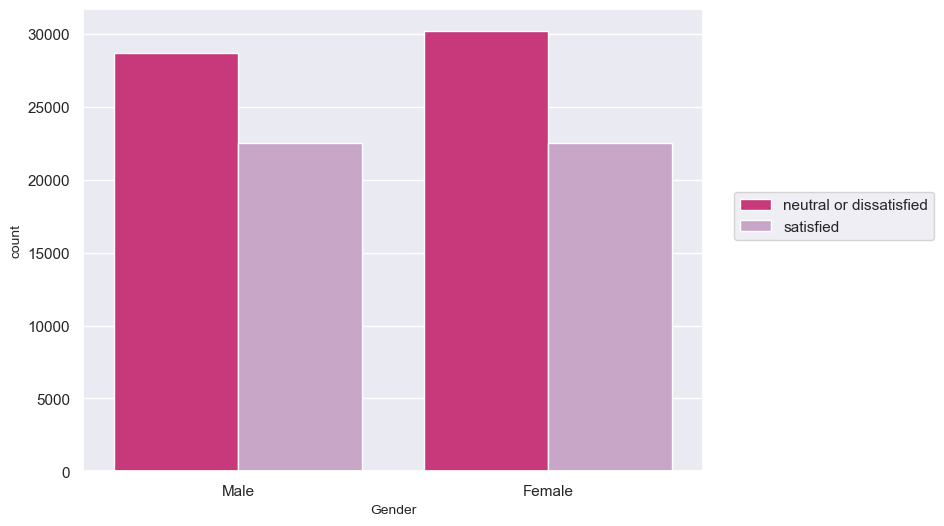

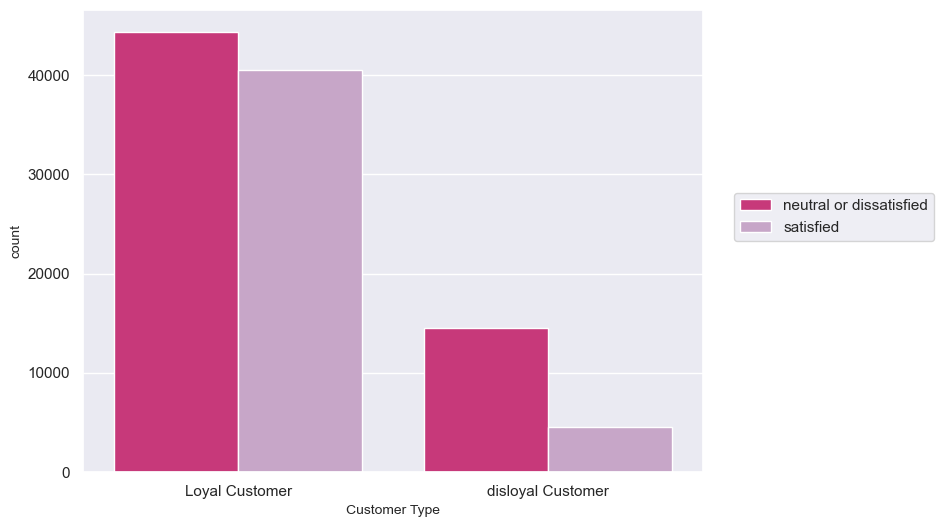

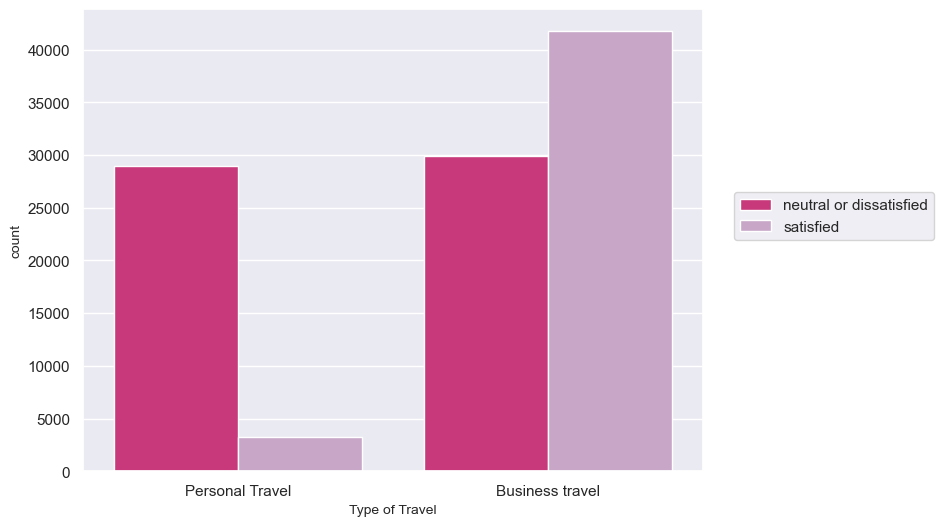

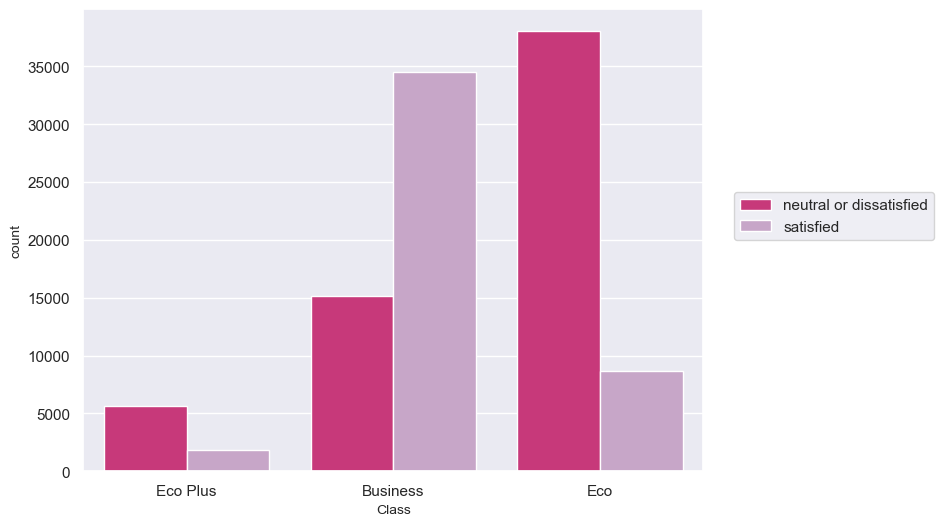

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df,x=col, hue='satisfaction', palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))
    

**Observations:**

- Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors
- Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers
- Business Travellers seems to be more satisfied with the flight, than the personal travellers
- People in business class seems to be the most satisfied lot, and those in economy class are least satisfied

## Arrival Delay in Minutes VS Departure Delay in minutes.

In [36]:
train_df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay in Minutes, dtype: float64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

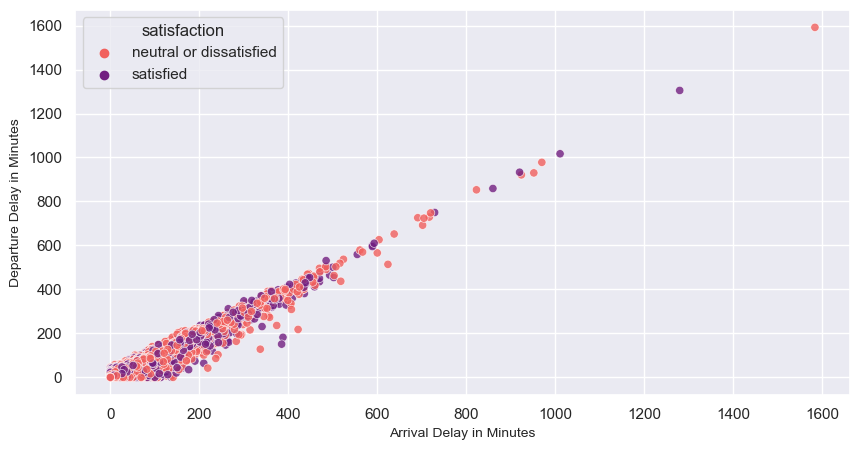

In [37]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=train_df, x="Arrival Delay in Minutes", y= "Departure Delay in Minutes", hue='satisfaction', palette="magma_r",alpha=0.8)

**Observations:**

The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 1 customer who was satisfied even after a delay of 1300 minutes!!

## Flight distance vs Departure Delay in Minutes

(0.0, 1000.0)

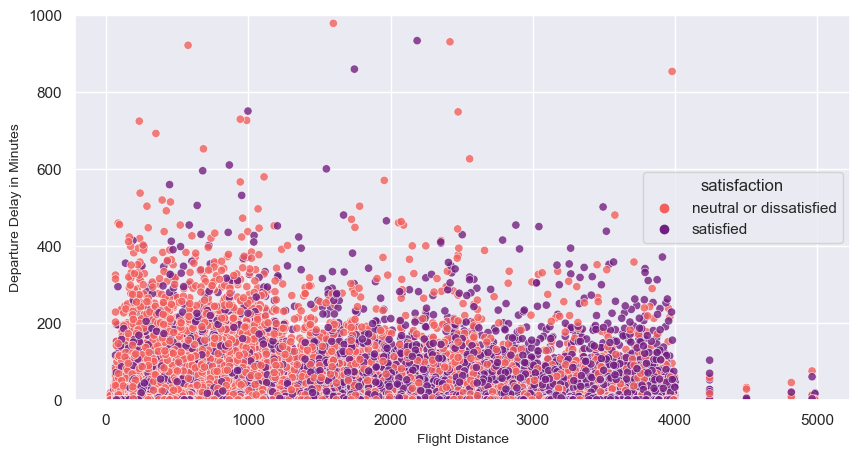

In [38]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=train_df, x="Flight Distance", y= "Departure Delay in Minutes", hue='satisfaction', palette="magma_r",alpha=0.8)
plt.ylim(0,1000)

**Observations:**
- The most important takeaway here is the longer the flight distance, most passengers are okay with flight delay in departure, which is strance finding from this plot!
- So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

## Age and Customer type

<Axes: xlabel='Age', ylabel='Count'>

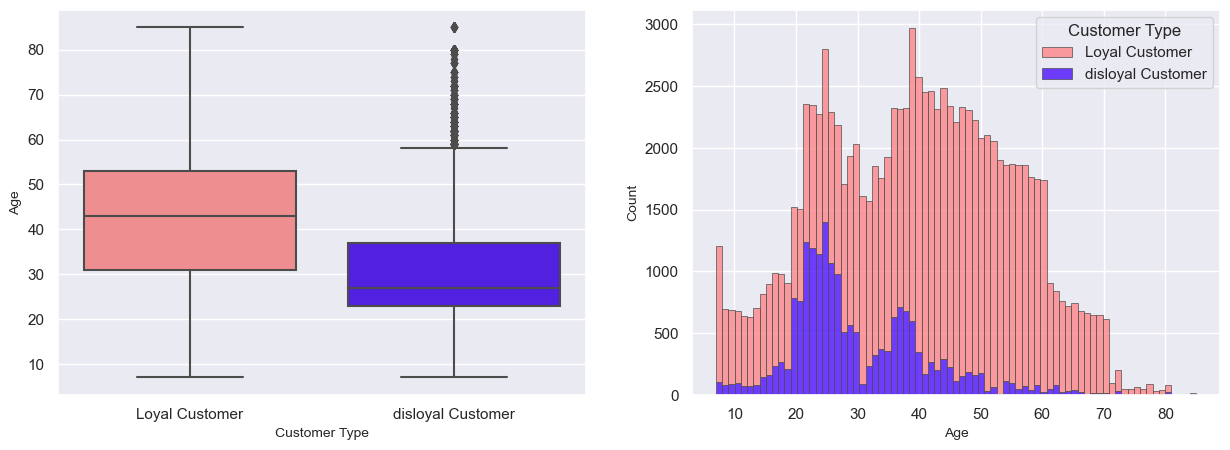

In [39]:
f, ax = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(data=train_df, x="Customer Type", y= "Age",palette = "gnuplot2_r", ax=ax[0])
sns.histplot(data=train_df, x="Age", hue="Customer Type", multiple="stack", palette = "gnuplot2_r",edgecolor = ".3", linewidth = .5, ax = ax[1])

**Observations:**
- From above we can conclude that most of the airline's regular customers are between the ages of 30 and 50(their average age is slightly above 40)
- The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).

## Age vs Class

<Axes: xlabel='Age', ylabel='Count'>

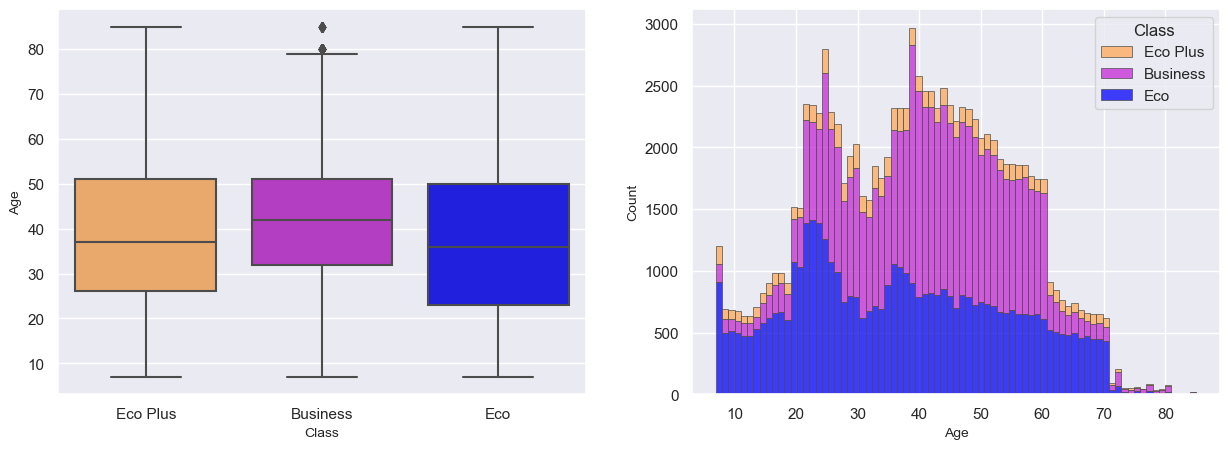

In [40]:
f, ax  =plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=train_df, x="Class", y="Age",palette = "gnuplot2_r", ax=ax[0])
sns.histplot(data=train_df, x="Age", hue="Class", multiple="stack", palette="gnuplot2_r",edgecolor = ".3", linewidth = .5, ax = ax[1])

- It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that regular customers mainly buy business class for themselves.

<Axes: xlabel='Flight Distance', ylabel='Count'>

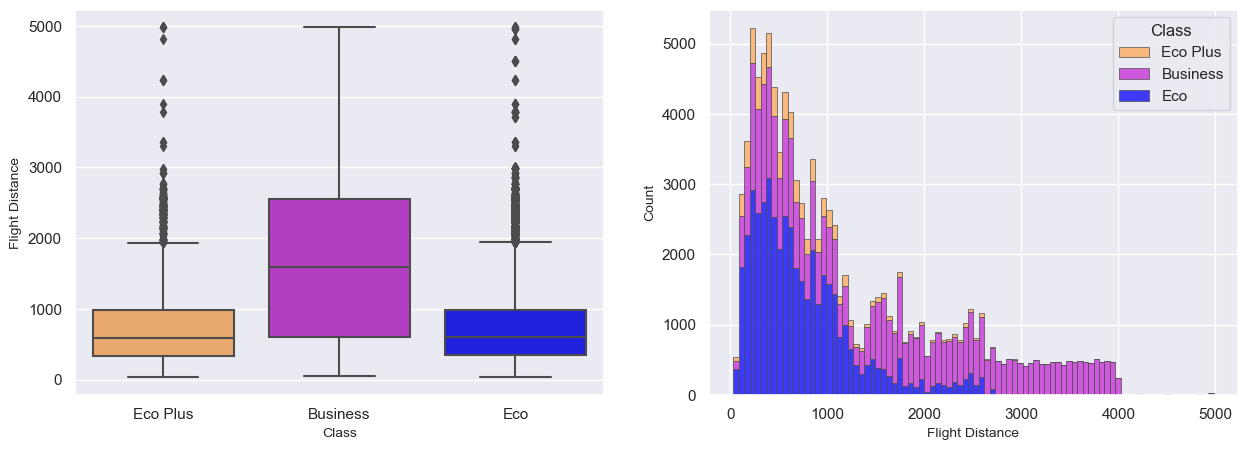

In [41]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

**Observations:**

- customers whose flight distance is long, mostly fly in business class.

## Flight Distance

<Axes: xlabel='Flight Distance', ylabel='Count'>

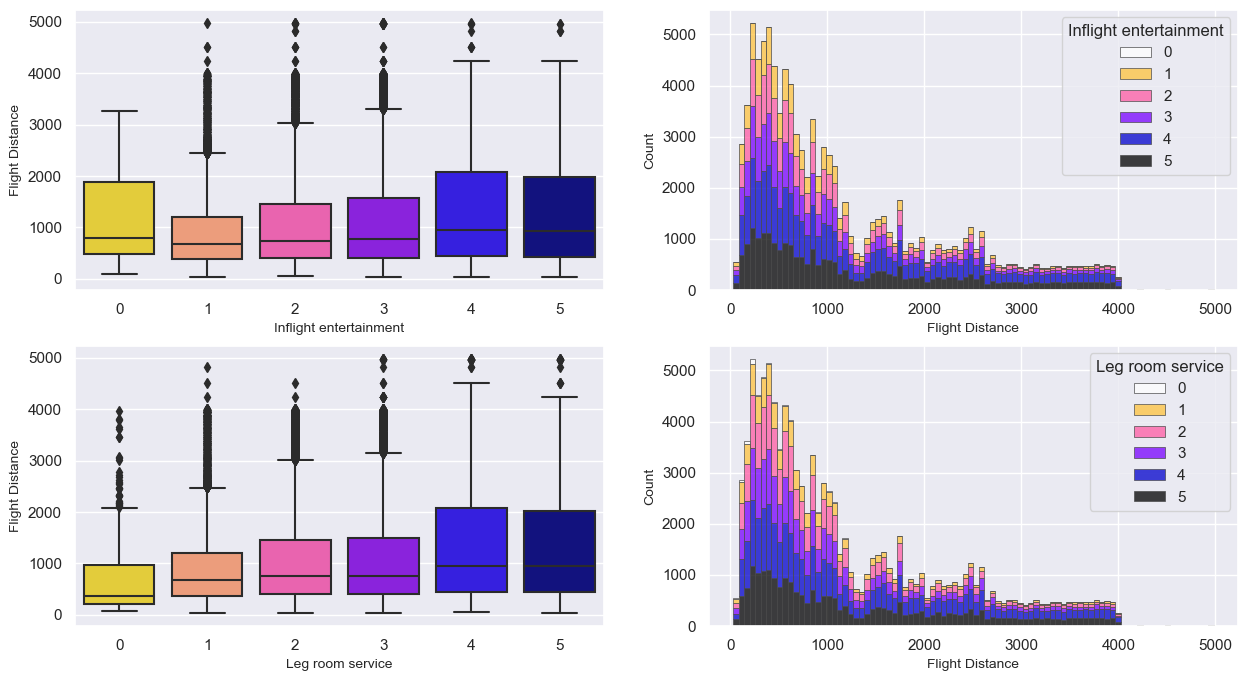

In [42]:
f,ax = plt.subplots(2,2, figsize=(15, 8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[1, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

**Observations:**

- The more distance an aircraft passenger travels (respectively, the longer they are in flight)
- The more they are satisfied with the entertainment in flight and the extra legroom (on average).

## Data preprocessing and Feature engineering

In [43]:
input_cols = list(train_df.iloc[:, :-1])
target_cols = "satisfaction"

In [44]:
pd.options.display.max_columns=30

In [45]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [46]:
train_df["Gender"] = pd.get_dummies(train_df["Gender"], drop_first=True, dtype="int")

In [47]:
train_df["Customer Type"]= pd.get_dummies(train_df["Customer Type"], drop_first=True, dtype="int")

In [48]:
train_df["Type of Travel"]= pd.get_dummies(train_df["Type of Travel"], drop_first=True, dtype="int")

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
train_df["Class"]=le.fit_transform(train_df["Class"])

In [52]:
train_df["Class"]

0         2
1         0
2         0
3         0
4         0
         ..
103899    1
103900    0
103901    0
103902    1
103903    0
Name: Class, Length: 103904, dtype: int32

In [53]:
train_df["Arrival Delay in Minutes"]

0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
median=train_df["Arrival Delay in Minutes"].median()

In [56]:
train_df["Arrival Delay in Minutes"].fillna(median, inplace=True)

In [57]:
train_df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [58]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [59]:
train_df["satisfaction"] = le.fit_transform(train_df["satisfaction"])

In [60]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train_val_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [63]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [64]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62342, 23)
(20781, 23)
(20781, 23)


In [65]:
# train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
# val_df['satisfaction'] = val_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
# test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [66]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83488,0,0,51,1,0,366,2,1,2,3,3,3,3,4,4,2,1,4,4,4,0,0.0,0
31648,0,0,38,1,1,109,4,3,4,4,5,4,5,5,1,1,4,5,1,5,0,2.0,1
22340,1,0,50,1,1,78,3,5,3,3,5,3,4,5,3,1,3,3,4,5,0,0.0,0
68992,0,0,43,0,0,1770,5,5,5,5,5,5,4,4,4,4,4,4,4,3,17,8.0,1
100108,1,0,19,1,1,762,3,5,3,3,2,3,4,2,4,3,5,4,5,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44593,1,0,54,0,2,989,4,3,3,3,4,4,4,4,4,5,4,3,4,4,25,17.0,0
59278,1,0,60,0,0,3358,0,4,0,2,2,5,4,5,5,5,5,3,5,5,0,0.0,1
29978,1,0,58,1,2,787,3,4,3,2,4,3,3,4,3,5,5,5,4,4,0,0.0,0
92224,0,0,57,1,1,431,0,5,0,2,2,5,5,5,5,0,5,3,5,5,0,0.0,1


## Scaling the features

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
# select the columns to be used for training/prediction

# training dataset
X_train = train_df.drop("satisfaction", axis=1)
y_train = train_df.satisfaction

In [70]:
X_val = val_df.drop("satisfaction", axis=1)
y_val = val_df.satisfaction

In [71]:
X_test = test_df.drop("satisfaction", axis=1)
y_test = test_df.satisfaction

## Non Tree Models

## Logistic Rregression

In [ ]:
from sklearn.metrics import 

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [76]:
X_train_new = scaler.fit_transform(X_train)

In [78]:
model = lr.fit(X_train_new, y_train)

In [81]:
y_pred = model.predict(X_test)

C:\Users\prajw\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [85]:
y_train_pred = lr.predict(X_train)

C:\Users\prajw\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [86]:
print(roc_auc_score(y_train, y_train_pred))

0.5835315055725931


In [83]:
from sklearn.metrics import classification_report, roc_auc_score

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.38      0.50     11713
           1       0.50      0.79      0.61      9068

    accuracy                           0.56     20781
   macro avg       0.60      0.59      0.55     20781
weighted avg       0.61      0.56      0.55     20781



In [84]:
print(roc_auc_score(y_test, y_pred))

0.585094454673947


In [87]:
from sklearn.pipeline import make_pipeline

In [115]:
pipe1 = make_pipeline(MinMaxScaler(), LogisticRegression())

In [116]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [117]:
y_pred = pipe1.predict(X_test)

In [118]:
roc_auc_score(y_test, y_pred)

0.8730210092722314

In [92]:
y_val_pred = pipe1.predict(X_val)

In [93]:
roc_auc_score(y_val, y_val_pred)

0.8708458021134586

In [127]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11858
           1       0.87      0.84      0.85      8923

    accuracy                           0.88     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
pipe2 = make_pipeline(MinMaxScaler(), GaussianNB())

In [121]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('gaussiannb', GaussianNB())])

In [122]:
y_pred = pipe2.predict(X_test)

In [130]:
y_pred_val = pipe2.predict(X_val)

In [123]:
roc_auc_score(y_test, y_pred)

0.8610807974249297

In [133]:
print(classification_report(y_test, y_pred))
print("classification report for validation dataset \n")
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11713
           1       0.86      0.82      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781

classification report for validation dataset 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11858
           1       0.86      0.82      0.84      8923

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



In [ ]:
########################## Linear SVC ###########################

In [134]:
from sklearn.svm import LinearSVC

In [135]:
pipe3 = make_pipeline(MinMaxScaler(), LinearSVC())

In [136]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('linearsvc', LinearSVC())])

In [137]:
y_pred = pipe3.predict(X_test)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [141]:
roc_auc_score(y_test, y_pred)

0.873198858630793

In [ ]:
###################### KNN Classifier ###################

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
pipe4 = make_pipeline(MinMaxScaler(), KNeighborsClassifier())

In [144]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [146]:
y_pred = pipe4.predict(X_test)

In [147]:
roc_auc_score(y_test, y_pred)

0.9209007351646613

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11713
           1       0.95      0.87      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



In [150]:
######################## Tree based algos ##################

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
pipe5 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())

In [153]:
pipe5.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [154]:
y_pred = pipe5.predict(X_test)

In [155]:
roc_auc_score(y_test, y_pred)

0.947444017559955

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [158]:
## Random Forest classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
pipe6 = make_pipeline(MinMaxScaler(),RandomForestClassifier())

In [162]:
pipe6.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [164]:
y_pred = pipe6.predict(X_test)

In [165]:
roc_auc_score(y_test, y_pred)

0.9581745901490247

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [168]:
#################  ADA Boost Classifer #################3

In [169]:
from sklearn.ensemble import AdaBoostClassifier

In [170]:
pipe7 = make_pipeline(MinMaxScaler(),AdaBoostClassifier())

In [171]:
pipe7.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [174]:
y_pred = pipe7.predict(X_test)

In [175]:
roc_auc_score(y_test, y_pred)

0.9250185597903935

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11713
           1       0.92      0.91      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



In [177]:
############## Gradient Boosting Classifier #############

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
pipe8 = make_pipeline(MinMaxScaler(),GradientBoostingClassifier())

In [180]:
pipe8.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [181]:
y_pred = pipe8.predict(X_test)

In [182]:
roc_auc_score(y_test, y_pred)

0.9406263003292501

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [184]:
################### XG Boost #######################

In [187]:
from xgboost import XGBClassifier

In [188]:
XGB = XGBClassifier()

In [189]:
XGB.fit(X_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [190]:
y_pred = XGB.predict(X_test_new)

In [191]:
roc_auc_score(y_test, y_pred)

0.9599248199032808

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

